# *비선형 활성화 함수*

비선형 활성화 함수(Activation function)는 각 뉴런에서 입력을 받아 수학적 변환을 수행하고 출력을 생성하는 함수<br>
ex) 계단 함수, sigmoid, softmax 등<br>

활성화 함수는 선형 함수가 아닌 비선형 함수여야 함<br><br>
<b>비선형 함수</b> : 직선 1개로 그릴 수 없는 함수<br>
<b>선형 함수</b> : 출력이 입력의 상수배만큼 변하는 함수<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;그래프를 그리면 직선으로 그려짐(W, b 상수)<br>
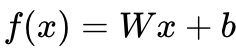

인공 신경망의 성능을 향상시키기 위해서는 은닉층을 계속해서 추가해야 함<br>
만약 활성화 함수로 선형 함수를 사용하면 은닉층을 쌓을 수가 없다<br>
ex) 활성화 함수가 선형 함수이고 은닉층을 두 개 추가하면 W * W * W * x이다<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;W의 세 제곱을 k라고 정의하면 y(x) = kx가 됨<br><br>
<b>즉, 선형 함수로는 은닉층을 여러 번 추가하더라도 1회 추가한 것과 차이를 줄 수 없다</b>

# 

# *Sigmoid & Vanishing Gradient*

In [1]:
import numpy as np
import matplotlib.pyplot as plt

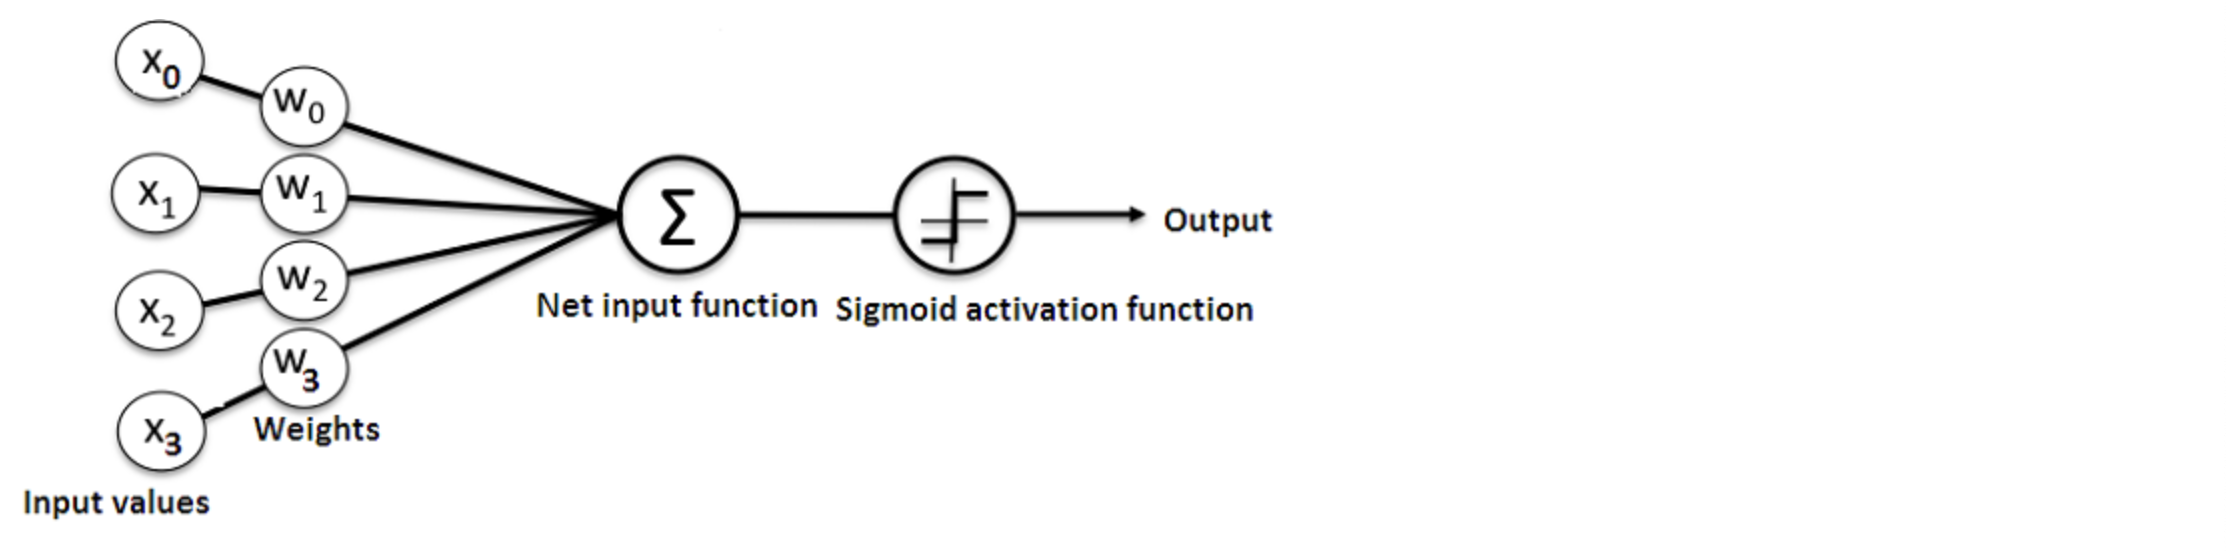

<b>학습 과정</b><br><br>
1. 인공 신경망은 입력에 대해서 순전파(forward propagation) 연산하고
2. 순전파 연산을 통해 나온 예측값과 실제값의 오차를 손실 함수(loss function)를 통해 계산하고
3. 이 손실(Loss)을 미분을 통해 기울기(gradient)를 구하고
4. 이를 통해 역전파(back propagation)를 수행

#### Sigmoid 함수의 문제점은 미분을 해서 기울기(Gradient)를 구할 때 발생

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [7]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

[-5.00000000e+00 -4.90000000e+00 -4.80000000e+00 -4.70000000e+00
 -4.60000000e+00 -4.50000000e+00 -4.40000000e+00 -4.30000000e+00
 -4.20000000e+00 -4.10000000e+00 -4.00000000e+00 -3.90000000e+00
 -3.80000000e+00 -3.70000000e+00 -3.60000000e+00 -3.50000000e+00
 -3.40000000e+00 -3.30000000e+00 -3.20000000e+00 -3.10000000e+00
 -3.00000000e+00 -2.90000000e+00 -2.80000000e+00 -2.70000000e+00
 -2.60000000e+00 -2.50000000e+00 -2.40000000e+00 -2.30000000e+00
 -2.20000000e+00 -2.10000000e+00 -2.00000000e+00 -1.90000000e+00
 -1.80000000e+00 -1.70000000e+00 -1.60000000e+00 -1.50000000e+00
 -1.40000000e+00 -1.30000000e+00 -1.20000000e+00 -1.10000000e+00
 -1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01 -1.77635684e-14  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
  6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01
  1.00000000e+00  1.10000

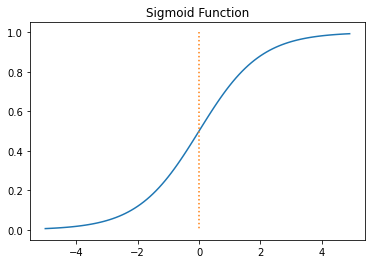

In [6]:
plt.plot(x, y)
plt.plot([0, 0], [1.0, 0.0], ':')   # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

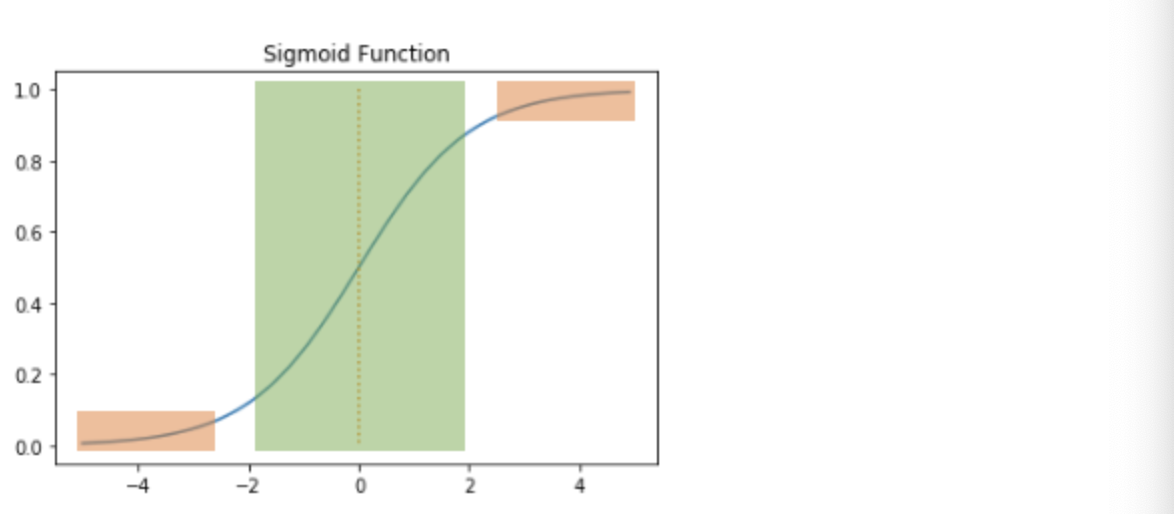
위 시그모이드 그래프에서 출력값이 0, 1에 가까워지면, 그래프의 기울기가 완만해진다.<br>
주황색 부분은 기울기를 계산하면 0에 가까운 아주 작은 값이 나온다<br>
역전파 과정에서 0에 가까운 아주 작은 기울기가 곱해지게 되면, 앞단에는 기울기가 잘 전달되지 않는다.<br><br>
이러한 현상을 <b>기울기 소실 문제(Vanishing Gradient Problem)</b>라고 함

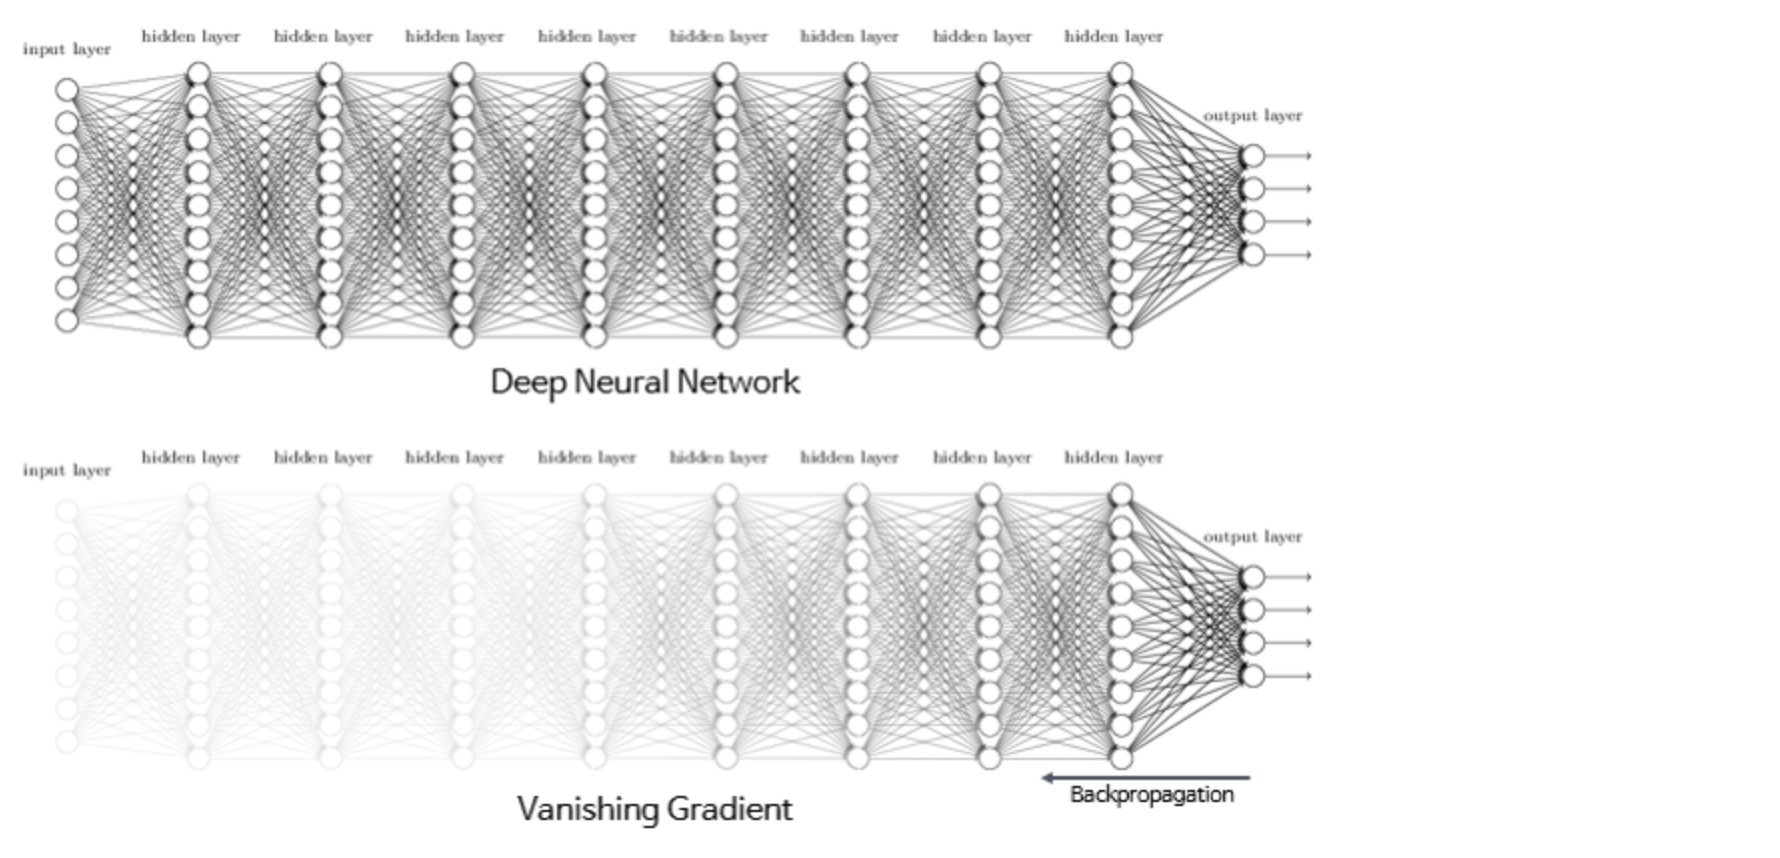
시그모이드 함수를 사용하는 은닉층 개수가 다수가 될 경우에는 0에 가까운 기울기가 계속 곱해지면 앞단에서는 거의 기울기를 전파받을 수 없게 됨<br>
<b>매개변수 W가 업데이트 되지 않아 학습이 되지 않는다</b><br>
은닉층이 깊은 신경망에서 기울기 소실 문제로 인해 출력층과 가까운 은닉층에서는 기울기가 잘 전파되지만, 앞단으로 갈수록 기울기가 제대로 전파되지 않는 모습<br>
#### 시그모이드 함수를 은닉층에서 사용 지양

# 

# *Hyperbolic Tangent*

입력값을 -1. 1 사이의 값으로 변환

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
x = np.arange(-5.0, 5.0, 0.1)
y = np.tanh(x)

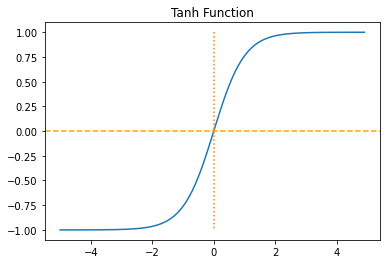

In [8]:
plt.plot(x, y)
plt.plot([0,0], [1.0, -1.0], ':')
plt.axhline(y=0, color='orange', linestyle='--')
plt.title('Tanh Function')
plt.show()

하이퍼볼릭탄젠트도 -1, 1과 가까운 출력값에서 시그모이드 함수와 같은 문제가 발생<br>
그러나 하이퍼볼릭탄젠트 함수는 시그모이드 함수와 달리 0을 중심으로 하고 있어, 반환값의 변화폭의 더 크다<br>
그래서 <b>시그모이드 함수보다 기울기 소실 증상이 적은 편</b>

# 

# *ReLU*

인공 신경망에서 가장 인기가 많은 함수<br>
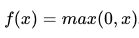

In [9]:
def relu(x):
    return np.maximum(0,x)

In [10]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

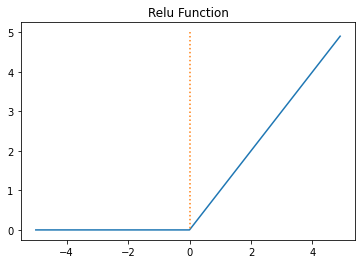

In [11]:
plt.plot(x, y)
plt.plot([0,0], [5.0, 0.0], ':')
plt.title('Relu Function')
plt.show()

렐루 함수는 음수를 입력하면 0을 출력하고, 양수를 입력하면 입력값을 그대로 반환<br>
<b>특정 양수값에 수렴하지 않으므로 깊은 신경망에서 시그모이드보다 잘 작동</b><br>
시그모이드, 하이퍼볼릭탄젠트 함수 같이 어떤 연산이 필요한 것이 아니라 <b>단순 임계값이므로 연산 속도도 빠름</b><br><br>
### 문제점
<b>죽은 렐루(dying ReLU)</b><br>
입력값이 음수면 기울기도 0이 되고, 이 뉴런은 다시 회생하는 것이 매우 어렵다<br>


# 

# *Leaky ReLU*

죽은 렐루 현상을 보완하기 위한 ReLU 변형 함수<br>
Leaky ReLU는 입력값이 음수일 경우에 0이 아니라 0.001과 같은 매우 작은 수를 반환함<br>

In [22]:
a = 0.1
def leaky_relu(x):
    return np.maximum(a*x, x)

In [23]:
x = np.arange(-5.0, 5.0, 0.1)
y = leaky_relu(x)

plt.plot(x, y)
plt.plot([0,0], [5.0, 0.0], ':')
plt.title('Leaky ReLU Function')
plt.show()

입력값이 음수라도 기울기가 0이 되지 않으므로 ReLU는 죽지 않는다

# 

# *Softmax*

분류 문제를 로지스틱 회귀와 소프트맥스 회귀를 출력층에 적용하여 사용

In [26]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

In [27]:
x = np.arange(-5.0, 5.0, 0.1)
y = softmax(x)

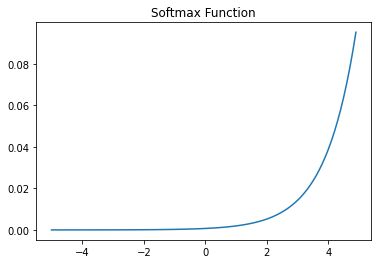

In [28]:
plt.plot(x, y)
plt.title('Softmax Function')
plt.show()

소프트맥스 함수는 시그모이드 함수처럼 출력층의 뉴런에서 주로 사용<br>
<b>시그모이드 함수</b> : 두 가지 선택지 중 하나를 고르는 이진 분류(Binary Classification) 문제에 사용<br>
<b>소프트맥스 함수</b> : 세 가지 이상의 선택지 중 하나를 고르는 다중 클래스 분류(MultiClass Classification) 문제에 주로 사용

# 

# *출력층 활성화 함수와 오차 함수의 관계*

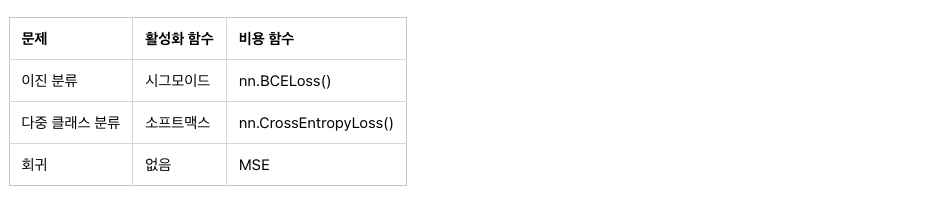